In [ ]:
import os
from random import sample 


In [ ]:
data = os.listdir('data/insect_data/')
names = []
for i in data:
    l = os.listdir('data/insect_data/' + i)
    for j in l:
        if j.endswith('.png') and ('rgba'not in j):
            names.append(os.path.join('data/insect_data/',i,j))
    

In [ ]:
final = sample(names,50)

In [ ]:
for i in final:
    print(i)
    os.system('cp ' + i + ' newdata')

In [ ]:
data = os.listdir('newdata')
for i in data:
    os.system('python process.py newdata/'+i)

In [ ]:
!python scripts/runall.py --dir ./newdata --gpu 0

In [ ]:
data = os.listdir('newdata')
data

In [22]:
import os
import subprocess
import re
data = os.listdir('newdata')
clip = []
for i in data:
    if 'rgba' in i:
        name = i.replace('_rgba', '')
        command = 'python -m kiui.cli.clip_sim newdata/' + i + ' logs/' + name.replace('.png', '.obj')
        
        # Execute the command and capture the output
        output = subprocess.getoutput(command)
        #print(output)
        
        # Append the output to the list
        match = re.search(r'\n(\d+\.\d+)', output)
        print(match)
        if match:
            number = float(match.group(1))
            clip.append(number)

# Print the extracted numbers
print(clip)
    


<re.Match object; span=(1670, 1690), match='\n0.47467177361249924'>
<re.Match object; span=(1649, 1669), match='\n0.44191623479127884'>
<re.Match object; span=(1667, 1686), match='\n0.5152910016477108'>
<re.Match object; span=(1671, 1690), match='\n0.5317449197173119'>
<re.Match object; span=(1664, 1683), match='\n0.5589916445314884'>
<re.Match object; span=(1670, 1689), match='\n0.5892109125852585'>
<re.Match object; span=(1670, 1689), match='\n0.6691168770194054'>
<re.Match object; span=(1664, 1683), match='\n0.5691172629594803'>
<re.Match object; span=(1669, 1688), match='\n0.5778087824583054'>
<re.Match object; span=(1668, 1688), match='\n0.47827835381031036'>
<re.Match object; span=(1670, 1689), match='\n0.5621219202876091'>
<re.Match object; span=(1666, 1685), match='\n0.5993569791316986'>
<re.Match object; span=(1668, 1687), match='\n0.5494785010814667'>
<re.Match object; span=(1657, 1676), match='\n0.4889725185930729'>
<re.Match object; span=(1667, 1686), match='\n0.50674214214

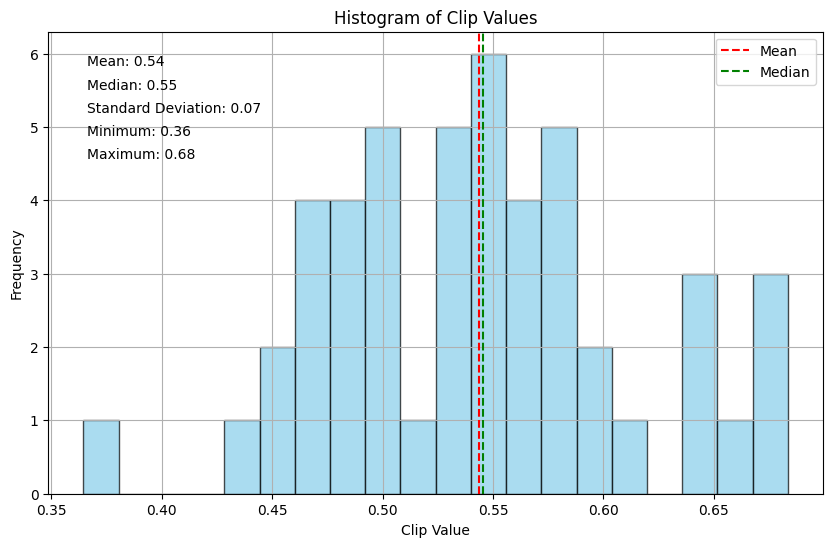

In [30]:
import matplotlib.pyplot as plt
import numpy as np
mean_clip = np.mean(clip)
median_clip = np.median(clip)
std_clip = np.std(clip)
min_clip = np.min(clip)
max_clip = np.max(clip)

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(clip, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Clip Values')
plt.xlabel('Clip Value')
plt.ylabel('Frequency')
plt.axvline(x=mean_clip, color='red', linestyle='--', label='Mean')
plt.axvline(x=median_clip, color='green', linestyle='--', label='Median')
plt.legend()
plt.grid(True)

# Add statistics as text annotations
plt.text(0.05, 0.95, f'Mean: {mean_clip:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.9, f'Median: {median_clip:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.85, f'Standard Deviation: {std_clip:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.8, f'Minimum: {min_clip:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.75, f'Maximum: {max_clip:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

In [38]:
from moviepy.editor import VideoFileClip

names = os.listdir('videos')

def convert_to_gif(video_path, gif_path, fps=10):
    # Load the video
    video = VideoFileClip(video_path)
    
    # Set the duration of the GIF to be the same as the video
    duration = video.duration
    
    # Generate the GIF
    video.write_gif(gif_path, fps=fps, program='ffmpeg')
    
    # Close the video
    video.close()

# Example usage
for i in names:
    video_path = 'videos/' + i
    gif_path = 'gifs/' + i.replace('.mp4', '.gif')
    convert_to_gif(video_path, gif_path)

t:   5%|▌         | 2/40 [00:17<05:32,  8.76s/it, now=None]

MoviePy - Building file  gifs/lepidoptera_44.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:17<05:37,  8.88s/it, now=None]

MoviePy - - File ready: gifs/lepidoptera_44.gif.
MoviePy - Building file  gifs/neuroptera_62.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:18<05:42,  9.01s/it, now=None]

MoviePy - - File ready: gifs/neuroptera_62.gif.
MoviePy - Building file  gifs/diptera_36.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:18<05:47,  9.15s/it, now=None]

MoviePy - - File ready: gifs/diptera_36.gif.
MoviePy - Building file  gifs/diptera_60.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:18<05:52,  9.28s/it, now=None]

MoviePy - - File ready: gifs/diptera_60.gif.
MoviePy - Building file  gifs/hemiptera_84.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:18<05:57,  9.41s/it, now=None]

MoviePy - - File ready: gifs/hemiptera_84.gif.
MoviePy - Building file  gifs/neuroptera_87.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:19<06:02,  9.53s/it, now=None]

MoviePy - - File ready: gifs/neuroptera_87.gif.
MoviePy - Building file  gifs/lepidoptera_58.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:19<06:06,  9.63s/it, now=None]

MoviePy - - File ready: gifs/lepidoptera_58.gif.
MoviePy - Building file  gifs/hemiptera_7.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:19<06:10,  9.75s/it, now=None]

MoviePy - - File ready: gifs/hemiptera_7.gif.
MoviePy - Building file  gifs/diplopoda_52.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:19<06:15,  9.88s/it, now=None]

MoviePy - - File ready: gifs/diplopoda_52.gif.
MoviePy - Building file  gifs/coleoptera_64.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:19<06:19, 10.00s/it, now=None]

MoviePy - - File ready: gifs/coleoptera_64.gif.
MoviePy - Building file  gifs/blattodea_69.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:20<06:24, 10.12s/it, now=None]

MoviePy - - File ready: gifs/blattodea_69.gif.
MoviePy - Building file  gifs/ephemeroptera_52.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:20<06:28, 10.23s/it, now=None]

MoviePy - - File ready: gifs/ephemeroptera_52.gif.
MoviePy - Building file  gifs/diptera_61.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:20<06:33, 10.36s/it, now=None]

MoviePy - - File ready: gifs/diptera_61.gif.
MoviePy - Building file  gifs/diptera_99.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:20<06:38, 10.50s/it, now=None]

MoviePy - - File ready: gifs/diptera_99.gif.
MoviePy - Building file  gifs/diptera_51.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:21<06:43, 10.61s/it, now=None]

MoviePy - - File ready: gifs/diptera_51.gif.
MoviePy - Building file  gifs/hemiptera_77.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:21<06:47, 10.73s/it, now=None]

MoviePy - - File ready: gifs/hemiptera_77.gif.
MoviePy - Building file  gifs/neuroptera_76.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:21<06:52, 10.84s/it, now=None]

MoviePy - - File ready: gifs/neuroptera_76.gif.
MoviePy - Building file  gifs/diptera_10.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:21<06:56, 10.96s/it, now=None]

MoviePy - - File ready: gifs/diptera_10.gif.
MoviePy - Building file  gifs/coleoptera_40.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:22<07:01, 11.09s/it, now=None]

MoviePy - - File ready: gifs/coleoptera_40.gif.
MoviePy - Building file  gifs/coleoptera_75.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:22<07:06, 11.22s/it, now=None]

MoviePy - - File ready: gifs/coleoptera_75.gif.
MoviePy - Building file  gifs/neuroptera_66.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:22<07:10, 11.34s/it, now=None]

MoviePy - - File ready: gifs/neuroptera_66.gif.
MoviePy - Building file  gifs/diplopoda_73.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:22<07:15, 11.47s/it, now=None]

MoviePy - - File ready: gifs/diplopoda_73.gif.
MoviePy - Building file  gifs/psocodea_11.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:23<07:20, 11.58s/it, now=None]

MoviePy - - File ready: gifs/psocodea_11.gif.
MoviePy - Building file  gifs/ephemeroptera_69.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:23<07:25, 11.72s/it, now=None]

MoviePy - - File ready: gifs/ephemeroptera_69.gif.
MoviePy - Building file  gifs/lepidoptera_79.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:23<07:30, 11.85s/it, now=None]

MoviePy - - File ready: gifs/lepidoptera_79.gif.
MoviePy - Building file  gifs/blattodea_18.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:23<07:34, 11.96s/it, now=None]

MoviePy - - File ready: gifs/blattodea_18.gif.
MoviePy - Building file  gifs/blattodea_21.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:24<07:39, 12.09s/it, now=None]

MoviePy - - File ready: gifs/blattodea_21.gif.
MoviePy - Building file  gifs/psocodea_80.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:24<07:44, 12.22s/it, now=None]

MoviePy - - File ready: gifs/psocodea_80.gif.
MoviePy - Building file  gifs/lepidoptera_87.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:24<07:48, 12.33s/it, now=None]

MoviePy - - File ready: gifs/lepidoptera_87.gif.
MoviePy - Building file  gifs/diptera_62.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:24<07:53, 12.46s/it, now=None]

MoviePy - - File ready: gifs/diptera_62.gif.
MoviePy - Building file  gifs/odonata_20.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:25<07:58, 12.61s/it, now=None]

MoviePy - - File ready: gifs/odonata_20.gif.
MoviePy - Building file  gifs/neuroptera_52.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:25<08:03, 12.73s/it, now=None]

MoviePy - - File ready: gifs/neuroptera_52.gif.
MoviePy - Building file  gifs/coleoptera_9.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:25<08:08, 12.86s/it, now=None]

MoviePy - - File ready: gifs/coleoptera_9.gif.
MoviePy - Building file  gifs/blattodea_19.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:25<08:13, 12.99s/it, now=None]

MoviePy - - File ready: gifs/blattodea_19.gif.
MoviePy - Building file  gifs/blattodea_97.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:26<08:18, 13.12s/it, now=None]

MoviePy - - File ready: gifs/blattodea_97.gif.
MoviePy - Building file  gifs/ephemeroptera_65.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:26<08:24, 13.27s/it, now=None]

MoviePy - - File ready: gifs/ephemeroptera_65.gif.
MoviePy - Building file  gifs/diptera_52.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:26<08:29, 13.41s/it, now=None]

MoviePy - - File ready: gifs/diptera_52.gif.
MoviePy - Building file  gifs/diptera_71.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:27<08:34, 13.54s/it, now=None]

MoviePy - - File ready: gifs/diptera_71.gif.
MoviePy - Building file  gifs/hemiptera_95.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:27<08:39, 13.68s/it, now=None]

MoviePy - - File ready: gifs/hemiptera_95.gif.
MoviePy - Building file  gifs/neuroptera_49.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:27<08:44, 13.80s/it, now=None]

MoviePy - - File ready: gifs/neuroptera_49.gif.
MoviePy - Building file  gifs/lepidoptera_50.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:27<08:49, 13.94s/it, now=None]

MoviePy - - File ready: gifs/lepidoptera_50.gif.
MoviePy - Building file  gifs/neuroptera_99.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:28<08:54, 14.08s/it, now=None]

MoviePy - - File ready: gifs/neuroptera_99.gif.
MoviePy - Building file  gifs/ephemeroptera_15.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:28<08:59, 14.19s/it, now=None]

MoviePy - - File ready: gifs/ephemeroptera_15.gif.
MoviePy - Building file  gifs/psocodea_34.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:28<09:04, 14.33s/it, now=None]

MoviePy - - File ready: gifs/psocodea_34.gif.
MoviePy - Building file  gifs/diptera_78.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:28<09:09, 14.46s/it, now=None]

MoviePy - - File ready: gifs/diptera_78.gif.
MoviePy - Building file  gifs/odonata_27.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:29<09:14, 14.60s/it, now=None]

MoviePy - - File ready: gifs/odonata_27.gif.
MoviePy - Building file  gifs/odonata_91.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:29<09:19, 14.71s/it, now=None]

MoviePy - - File ready: gifs/odonata_91.gif.
MoviePy - Building file  gifs/blattodea_53.gif
MoviePy - - Generating GIF frames.


t:   5%|▌         | 2/40 [00:29<09:23, 14.82s/it, now=None]

MoviePy - - File ready: gifs/blattodea_53.gif.
